# The enlightened game of life (simplified)

Simulate the Conway's Game of Life coupled to 2D electromagnetic dynamics by FDTD

See [ArXiv:0810.3179](https://arxiv.org/abs/0810.3179)

Author nonlinearxwaves@gmail.com <br> 
Version 12 april 2020 <br>
**W Italia !**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

Scale for the EM field

In [2]:
E0 = 10

Grid size

In [3]:
SizeX = 51

In [4]:
SizeY = 41

Vacuum impedence

In [5]:
Z0 = 377.0

Courant number (must be smaller than one)

In [6]:
C = 0.5

Update functions

In [7]:
def updateH():
    for m in range(SizeX):
        for n in range(SizeY-1):
            Hx[m,n]+=-(C/Z0)*(Ez[m, n+1]-Ez[m,n])
    for m in range(SizeX-1):
        for n in range(SizeY):
            Hy[m,n]+=(C/Z0)*(Ez[m+1, n]-Ez[m,n])

In [8]:
def updateE():
    for m in range(1,SizeX-1):
        for n in range(1, SizeY-1):
            Ez[m,n]+=C*Z0*((Hy[m,n]-Hy[m-1,n])-(Hx[m,n]-Hx[m,n-1]))

In [9]:
def updateCA(CA):
    CA1=np.copy(CA)
    def count_neigh(m,n):
        # periodical BC
        mm = np.mod(m-1,SizeX)
        mq = np.mod(m+1,SizeX)
        nm = np.mod(n-1,SizeY)
        nq = np.mod(n+1,SizeY)        
        return CA[mm,n]+CA[mq,n]+ \
                CA[m,nm]+CA[m,nq]+ \
                CA[mm,nm]+CA[mq,nq]+CA[mq,nm]+CA[mm,nq]

    for m in range(SizeX):
        for n in range(SizeY):
            neigh = count_neigh(m,n)
            if CA[m,n]==1:
                if (neigh<2)or(neigh>3):
                    CA1[m,n]=0
            else:
                if (neigh==3): 
                    CA1[m,n]=1                    
            # Here the coupling with the EM field (if enough energy density survive)       
            if np.square(Ez[m,n])>1.0:
                CA1[m,n]=1
            
    return CA1

Main loop with plotting <br>
(try running varying `E0`, say 1, 20, 100)

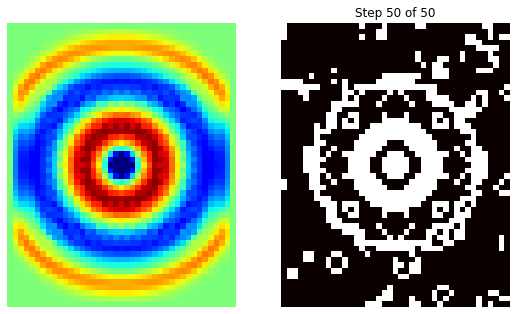

In [11]:
E0 = 15
MaxT=50
Hx = np.zeros((SizeX, SizeY-1), dtype=np.float32)
Hy = np.zeros((SizeX-1, SizeY), dtype=np.float32)
Ez = np.zeros((SizeX, SizeY), dtype=np.float32)
CA = np.random.randint(2,size=(SizeX,SizeY))
for it in range(MaxT):
    CA=updateCA(CA)
    updateH()
    updateE()
    # add a source current 
    Ez[25,20]+=E0*np.sin(0.2*it)*np.exp(-0.0*it)
    # outputs
    clear_output(wait=True)
    plt.figure(figsize=(9,9))
    plt.subplot(1,2,1)
    plt.imshow(Ez, cmap='jet', vmin=-0.1*E0, vmax=0.1*E0,
           interpolation='nearest', origin='lower')
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(CA, cmap='hot',
           interpolation='nearest', origin='lower')
    plt.title('Step '+ repr(it+1) + ' of ' +repr(MaxT))
    plt.axis("off")
    plt.show()   


In [12]:
plt.savefig("EGOL.png")

<Figure size 432x288 with 0 Axes>